Name: Aparna Iyer

PRN: 22071026017

Batch: AI-ML A1, 2022-2026

###**Title: Markov Decision Process (MDP)**

In [ ]:
import numpy as np                    #Import NumPy for numerical computations
import gym                            #Importing the OpenAI Gymnasium Library for creating & interacting with the environment
from IPython import display           #Importing display module /display utilities for animations
from matplotlib import pyplot as plt  #Importing matplotlib for visualizations
from envs import Maze                 #From the envs Module, importing the Maze Environment
%matplotlib inline


Making the environment: Maze()




In [ ]:
env = Maze()  #env is an instance of the Maze class, imported from Gymnasium Library

In [ ]:
env.reset()   #State is restored to the initial state by calling the reset method of the Maze class

(0, 0)

In [ ]:
initial_state = env.reset()  #initial_state variable is set to the Initial State of the Agent

print(f"The new episode will start in state: {initial_state}")

The new episode will start in state: (0, 0)


env.render Method:

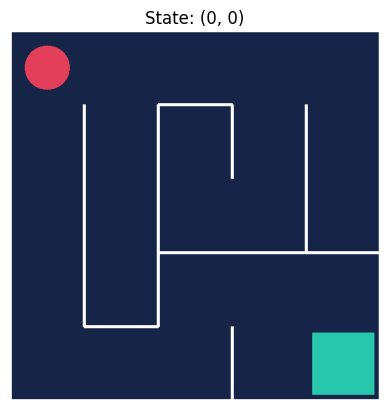

In [ ]:
frame = env.render(mode='rgb_array')  #Render the current state of the environment in the variable frame, which is displayed
plt.axis('off')                       #Turn off the axis to provide a clean visual representation
plt.title(f"State: {initial_state}")  #Add a title indicating the current state
plt.imshow(frame)                     #Display the rendered RGB frame as an image using Matplotlib

env.step() Method: Applies action selected by agent in the environment, to modify it.

In response, the environment returns a tuple of 4 objects:

1. The next state
2. The reward obtained
3. (bool) If the task has been completed (done)
4. Any other relevant information, in a Python Dictionary

In [ ]:
action = 2
next_state, reward, done, info = env.step(action)
print(f"After moving down 1 row, the agent is in state: {next_state}")
print(f"After moving down 1 row, we got a reward of: {reward}")
print(f"After moving down 1 row, the task is","" if done else "not","finished.")

After moving down 1 row, the agent is in state: (1, 0)
After moving down 1 row, we got a reward of: -1.0
After moving down 1 row, the task is not finished.


In [ ]:
#0: Up
#1: Right
#2: Down
#3: Left

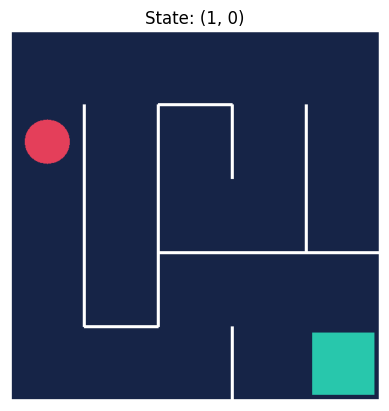

In [ ]:
frame = env.render(mode='rgb_array')  #Render the current state of the environment
plt.axis('off')                       #Turn off the axis to provide a clean visual representation
plt.title(f"State: {next_state}")     #Add a title indicating the current state
plt.imshow(frame)                     #Display the rendered RGB frame as an image using Matplotlib

In [ ]:
env.close()

States and State Space

s=(row,column)

row, column belong to {0,1,2,3,4}



In [ ]:
env = Maze()

print(f"For example, the initial state: {env.reset()}")
print(f"The space state is of type: {env.observation_space}")

For example, the initial state: (0, 0)
The space state is of type: MultiDiscrete([5 5])


Actions and Action Space

0 --> Move up
1 --> Move Right
2 --> Move Down
3 --> Move Left

In [ ]:
print(f"An example of a valid action is: {env.action_space.sample()}")
print(f"The space action is of type: {env.action_space}")

An example of a valid action is: 3
The space action is of type: Discrete(4)


Episodes and Trajectories

Trajectory: Sequence generated by moving from one arbitrary state to another

Episode: Journey over time from initial to final state

In [ ]:
env = Maze()     #Instantiate Maze class as the object env
state = env.reset()  #Call the reset method of the Maze class, store the initial state in the 'state' variable
trajectory = []  #Initialized as an array, as it contains a series of actions
count=0
while not done:
  action = env.action_space.sample()  #Randomly sample an action from the environment
  next_state, reward, done, extra_info = env.step(action)
  trajectory.append([state,action,reward,done,next_state])
  state = next_state
  count+=1
env.close()

print(f"Congrats! You just generated your first trajectory:\n{trajectory}")
print(f"Number of steps in this trajectory: {count}")

Congrats! You just generated your first trajectory:
[[(0, 0), 3, -1.0, False, (0, 0)], [(0, 0), 0, -1.0, False, (0, 0)], [(0, 0), 1, -1.0, False, (0, 1)], [(0, 1), 0, -1.0, False, (0, 1)], [(0, 1), 1, -1.0, False, (0, 2)], [(0, 2), 0, -1.0, False, (0, 2)], [(0, 2), 2, -1.0, False, (0, 2)], [(0, 2), 0, -1.0, False, (0, 2)], [(0, 2), 3, -1.0, False, (0, 1)], [(0, 1), 3, -1.0, False, (0, 0)], [(0, 0), 2, -1.0, False, (1, 0)], [(1, 0), 2, -1.0, False, (2, 0)], [(2, 0), 2, -1.0, False, (3, 0)], [(3, 0), 0, -1.0, False, (2, 0)], [(2, 0), 3, -1.0, False, (2, 0)], [(2, 0), 3, -1.0, False, (2, 0)], [(2, 0), 3, -1.0, False, (2, 0)], [(2, 0), 0, -1.0, False, (1, 0)], [(1, 0), 2, -1.0, False, (2, 0)], [(2, 0), 0, -1.0, False, (1, 0)], [(1, 0), 0, -1.0, False, (0, 0)], [(0, 0), 1, -1.0, False, (0, 1)], [(0, 1), 0, -1.0, False, (0, 1)], [(0, 1), 1, -1.0, False, (0, 2)], [(0, 2), 3, -1.0, False, (0, 1)], [(0, 1), 2, -1.0, False, (1, 1)], [(1, 1), 2, -1.0, False, (2, 1)], [(2, 1), 0, -1.0, False, (1, 

In [ ]:
env = Maze()     #Instantiate Maze class as the object env
state = env.reset()  #Call the reset method of the Maze class, store the initial state in the 'state' variable
trajectory = []  #Initialized as an array, as it contains a series of actions
count=0
for _ in range(3):
  action = env.action_space.sample()
  next_state, reward, done, extra_info = env.step(action)
  trajectory.append([state,action,reward,done,next_state])
  state = next_state
  count+=1
env.close()

print(f"Congrats! You just generated your second trajectory:\n{trajectory}")
print(f"Number of steps in this trajectory: {count}")

Congrats! You just generated your second trajectory:
[[(0, 0), 2, -1.0, False, (1, 0)], [(1, 0), 0, -1.0, False, (0, 0)], [(0, 0), 3, -1.0, False, (0, 0)]]
Number of steps in this trajectory: 3


In [ ]:
env = Maze()  #Creating an instance env, of Maze class
state = env.reset()
done = False
gamma = 0.99 #Discounting factor
G_0 = 0
t = 0

while not done:
  action = env.action_space.sample()
  _,reward,done,_ = env.step(action)
  G_0 += gamma**t * reward  #Cumulative Reward
  t+=1
env.close()

print(f"""It took us {t} moves to find the exit, and each reward r(s,a)=-1, so the return amounts to {G_0}.""")

It took us 239 moves to find the exit, and each reward r(s,a)=-1, so the return amounts to -90.94660417148224.


Policy Algorithm

Rewards and Returns

In [ ]:
env=Maze()
state=env.reset()